## Imports

In [52]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from typing import List
from functools import reduce

## Q-1) Load Fashion Mnist Dataset and Plot One sample from each class

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
print(f"X Train Shape: {x_train.shape}")
print(f"Y Train Shape: {y_train.shape}")
print('\n')
print(f"X Test Shape: {x_test.shape}")
print(f"Y Test Shape: {y_test.shape}")

X Train Shape: (60000, 28, 28)
Y Train Shape: (60000,)


X Test Shape: (10000, 28, 28)
Y Test Shape: (10000,)


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

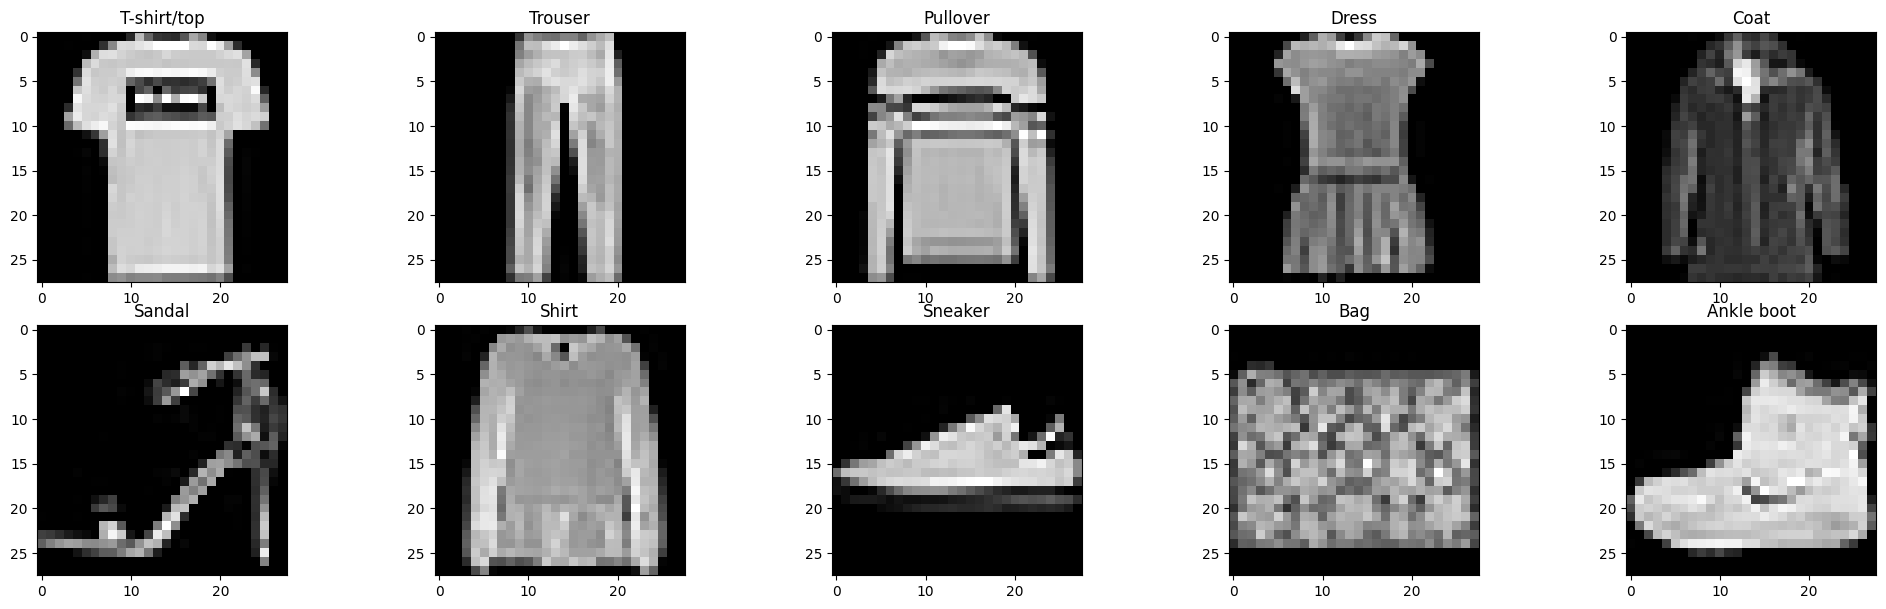

In [29]:
# Create a 2x5 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))

# Adjust layout to give space between plots
fig.tight_layout(pad=1.0)

for i, ax in enumerate(axs.flatten()):
        for j in range(len(y_train)):
            if y_train[j] == i:
                ax.imshow(x_train[j], cmap='gray')
                ax.set_title(class_names[i])
                break
            else:
                continue

## Q-2) Implement FFNN

In [117]:
def Relu(x):
    return np.where(x<0,0,x)

def Softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

class FFN:
    def __init__(self,input_dimension:int, output_dimension:int, num_hidden_layer:int, num_neurons:List):

        if not isinstance(input_dimension,int):
            raise TypeError('input_dimension must be an integer')
        
        if not isinstance(output_dimension, int):
            raise TypeError('output_dimension must be an integer')

        if not isinstance(num_hidden_layer, int):
            raise TypeError('num_hidden_layer must be an integer')
        
        if not isinstance(num_neurons,List):
            raise TypeError('num_neurons must be a list of integer')
        
        assert len(num_neurons) == num_hidden_layer, 'Hidden Layers and Neurons Mismatch'

        self.input_dimension = input_dimension
        self.output_dimension = output_dimension
        self.num_hidden_layer = num_hidden_layer
        self.num_neurons = num_neurons
        self.activation = Relu


    def forward(self,x, weights:List[np.ndarray]):

        for i,weight in enumerate(weights):
            x = np.matmul(weight,x)
            if i != len(weights)-1:
                x = self.activation(x)
            else:
                x = Softmax(x)

        return x


        
        



